# Lesson 18 - Decision Tree Classifier

### The following topics are discussed in this notebook:
* Overview of decision tree classifiers. 
* Implementing decision trees using Scikit-Learn.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles, make_blobs
import MLUtilities as mlu
import ipywidgets as widgets

## Introduction to Decision Trees

Decision tree algorithms apply a divide-and-conquer strategy to split the feature space into small rectangular regions. A single label value is then assigned to each of the regions for the purposes of making predictions. 

Decision trees can be used for either classification or regression tasks. In this lecture, we will focus on using decision trees for classification.

### Example 1

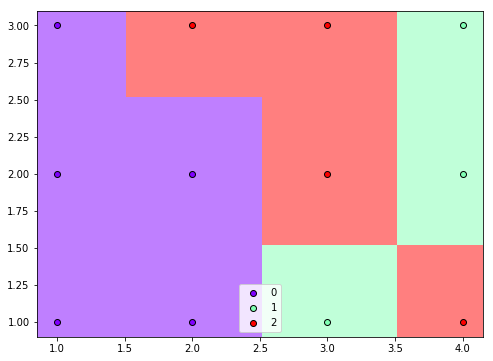

In [4]:
X = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3],[4,1],[4,2],[4,3]])
y = np.array([0,0,0,  0,0,2,  1,2,2,  2,1,1])

tree_mod = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=2)
tree_mod.fit(X,y)
mlu.plot_regions(tree_mod, X, y)

One advantage of decision trees is that they generate easy to understand rules-based heuristics for making predictions. The rules generated by a decision tree are often represented in a flowchart, such as the following one. 

<img src="Images/tree01.png", align="left">

### Example 2

# Finding Gini score (G)

<p>G = P[Misclassification]</p>
G = P<sub>b</sub>(P<sub>r</sub>)+P<sub>r</sub>(P<sub>b</sub>)

## or

<p>G = 1-P[Correct Classification]</p>
G = 1-(P<sub>b</sub>(P<sub>b</sub>)+P<sub>r</sub>(P<sub>r</sub>))

## or

G = 1-sum(P<sup>2</sup>)

## or
<p>l = left side</p>
<p>r = right side</p>
<p>n = total number of points</p>
<p>N<sub>l</sub> = number of points on left</p>
<p>N<sub>r</sub> = number of points on right</p>
<p>G<sub>l</sub> = Gini score on left</p>
<p>G<sub>r</sub> = Gini score on right</p>
G = (1/n)***(N<sub>l</sub>(G<sub>l</sub>)+N<sub>r</sub>(G<sub>r</sub>))

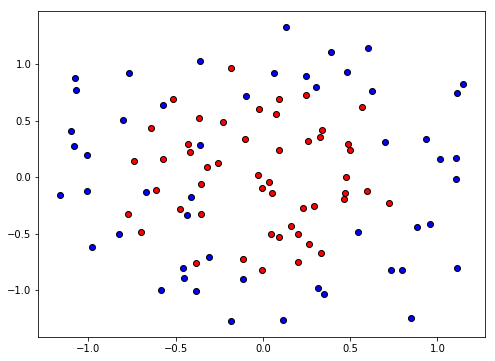

In [13]:
X, y = make_circles(n_samples=100, noise=0.25, random_state=9662, factor=0.4)

plt.close()
plt.rcParams["figure.figsize"] = [8,6]
plt.scatter(X[y==0,0],X[y==0,1],c='b', edgecolor='k')
plt.scatter(X[y==1,0],X[y==1,1],c='r', edgecolor='k')
plt.show()

In [14]:
def knn_example_1(max_depth):
    tree_mod = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=1, min_samples_leaf =5)
    tree_mod.fit(X,y)
    mlu.plot_regions(tree_mod, X, y)
    
    print('Training Accuracy:', tree_mod.score(X,y))

_ = widgets.interact(knn_example_1,
                     max_depth=widgets.IntSlider(min=1,max=15,step=1,value=1,continuous_update=False))

A Jupyter Widget

<img src="Images/tree02.png", align="left">

### Example 3

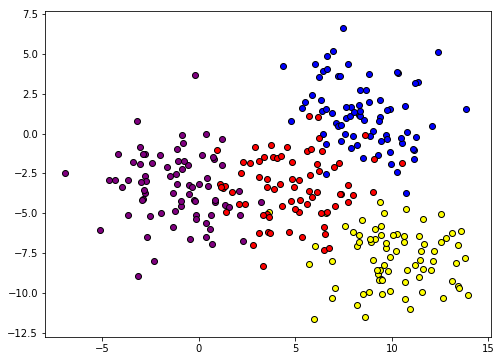

In [15]:
X, y = make_blobs(n_samples=300, centers=4, random_state=2997, n_features=2, cluster_std=2)

plt.close()
plt.scatter(X[y==0,0],X[y==0,1],c='purple', edgecolor='k')
plt.scatter(X[y==1,0],X[y==1,1],c='blue', edgecolor='k')
plt.scatter(X[y==2,0],X[y==2,1],c='yellow', edgecolor='k')
plt.scatter(X[y==3,0],X[y==3,1],c='red', edgecolor='k')
plt.show()

In [20]:
def knn_example_2(max_depth):
    tree_mod = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=1)
    tree_mod.fit(X,y)
    mlu.plot_regions(tree_mod, X, y)
    
    print('Training Accuracy:', tree_mod.score(X,y))

_ = widgets.interact(knn_example_2,
                     max_depth=widgets.IntSlider(min=1,max=15,step=1,value=1, continuous_update=False))

A Jupyter Widget

<img src="Images/tree03.png", align="left">

### Example 4: Iris Dataset

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.tree import export_graphviz

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
iris = pd.read_table(filepath_or_buffer='Datasets/iris.txt', sep='\t')
iris.head(n=10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.5,4.2,1.4,0.2,setosa
1,5.6,3.0,4.5,1.5,versicolor
2,7.2,3.6,6.1,2.5,virginica
3,4.8,3.0,1.4,0.3,setosa
4,5.5,2.4,3.8,1.1,versicolor
5,5.8,2.7,3.9,1.2,versicolor
6,6.0,3.4,4.5,1.6,versicolor
7,7.7,3.0,6.1,2.3,virginica
8,6.2,2.9,4.3,1.3,versicolor
9,4.9,3.1,1.5,0.2,setosa


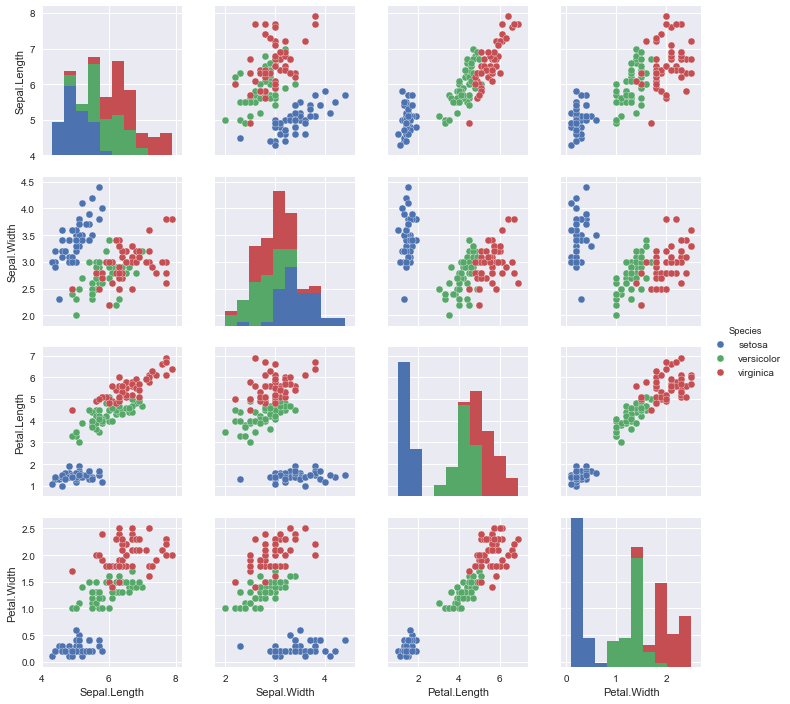

In [9]:
plt.close()
g = sns.pairplot(iris, hue="Species")
plt.show()

In [12]:
X = iris.iloc[:,:4]
y = iris.iloc[:,4]

In [16]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(120,)
(75,)
(75,)


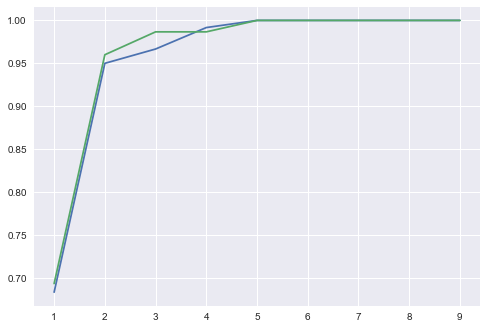

In [17]:
train_scores = []
val_scores = []

rng = range(1,10)

for i in rng:
    temp_mod = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=1)
    temp_mod.fit(X_train, y_train)
    train_scores.append(temp_mod.score(X_train, y_train))
    val_scores.append(temp_mod.score(X_val, y_val))

plt.close()
plt.plot(rng, train_scores)
plt.plot(rng, val_scores)
plt.show()

In [18]:
tree_mod = DecisionTreeClassifier(max_depth = 5, criterion='gini', random_state=1)
tree_mod.fit(X_train, y_train)

print(tree_mod.score(X_test, y_test))

0.96


In [20]:
export_graphviz(tree_mod, out_file='tree.dot', filled=True, rounded=True)